# review_data.csv 를 전처리 하는 코드

In [1]:
import pandas as pd
import numpy as np

# 데이터 로드
df = pd.read_csv('data/Coupang-reviews-homeplanet/review_data.csv')

In [3]:
df.head(5)

,상품명,구매상품명,작성일자,구매자명,평점,헤드라인,리뷰내용,도움수,이미지수
0,"홈플래닛 10W USB-A 2포트 멀티 충전기 (5V 2A), 화이트, 1개","홈플래닛 10W USB-A 2포트 멀티 충전기 (5V 2A), 화이트, 1개",2025.06.04,아아잉,5,NaN,NaN,0,0
1,"홈플래닛 10W USB-A 2포트 멀티 충전기 (5V 2A), 화이트, 1개","홈플래닛 10W USB-A 2포트 멀티 충전기 (5V 2A), 화이트, 1개",2025.06.03,정*날,5,잘 작동합니다.,잘 작동합니다.,0,0
2,"홈플래닛 10W USB-A 2포트 멀티 충전기 (5V 2A), 화이트, 1개","홈플래닛 10W USB-A 2포트 멀티 충전기 (5V 2A), 화이트, 2개",2025.06.03,정*준,5,NaN,NaN,0,0
3,"홈플래닛 10W USB-A 2포트 멀티 충전기 (5V 2A), 화이트, 1개","홈플래닛 10W USB-A 2포트 멀티 충전기 (5V 2A), 화이트, 1개",2025.06.03,백경민,5,NaN,NaN,0,0
4,"홈플래닛 10W USB-A 2포트 멀티 충전기 (5V 2A), 화이트, 1개","홈플래닛 10W USB-A 2포트 멀티 충전기 (5V 2A), 화이트, 1개",2025.06.03,백*수,3,NaN,NaN,0,0


In [4]:
# 헤드라인과 리뷰내용이 모두 결측값인 데이터와 아닌 데이터로 분리
df_complete_text = df.dropna(subset=['헤드라인', '리뷰내용'], how='all')  # 둘 다 NaN인 경우 제거
df_non_text = df[df['헤드라인'].isnull() & df['리뷰내용'].isnull()]  # 둘 다 NaN인 경우만 선택

In [11]:
df_complete_text.head()

,상품명,구매상품명,작성일자,구매자명,평점,헤드라인,리뷰내용,도움수,이미지수
1,"홈플래닛 10W USB-A 2포트 멀티 충전기 (5V 2A), 화이트, 1개","홈플래닛 10W USB-A 2포트 멀티 충전기 (5V 2A), 화이트, 1개",2025.06.03,정*날,5,잘 작동합니다.,잘 작동합니다.,0,0
6,"홈플래닛 10W USB-A 2포트 멀티 충전기 (5V 2A), 화이트, 1개","홈플래닛 10W USB-A 2포트 멀티 충전기 (5V 2A), 화이트, 1개",2025.06.03,이*민,4,♡Pulio 충전기로 쓰시려는 분들은 보세요♡,⚡️⚡️⚡️⚡️풀리오 동시충전 안됩니다⚡️⚡️⚡️⚡️풀리오 발마사지기 5V 2A 충...,0,0
7,"홈플래닛 10W USB-A 2포트 멀티 충전기 (5V 2A), 화이트, 1개","홈플래닛 10W USB-A 2포트 멀티 충전기 (5V 2A), 화이트, 2개",2025.06.02,박*혜,5,충전용으로 구매,다이소에서 조명을 샀는데저속충전 제품이 필요해 구매했어요충전기는 다이소보다 쿠팡이 ...,0,0
12,"홈플래닛 10W USB-A 2포트 멀티 충전기 (5V 2A), 화이트, 1개","홈플래닛 10W USB-A 2포트 멀티 충전기 (5V 2A), 화이트, 2개",2025.06.01,고*석,5,"작지만 든든한 2포트 충전기, 집·사무실 필수템!",후기 제목: 작지만 실속 있는 듀얼 충전기! 집안 곳곳에 두기 딱 좋아요집에서 자주...,0,0
14,"홈플래닛 10W USB-A 2포트 멀티 충전기 (5V 2A), 화이트, 1개","홈플래닛 10W USB-A 2포트 멀티 충전기 (5V 2A), 화이트, 2개",2025.06.01,고*석,5,두 기기 동시에 OK! 작지만 실속 있는 듀얼 USB,후기 제목: 간편한 듀얼 충전! 작지만 실속 있는 홈플래닛 USB 충전기여러 기기 ...,0,0


In [12]:
df_complete_text.describe()

,평점,도움수,이미지수
count,100582.000000,100582.000000,100582.000000
mean,4.733044,3.383210,4.826967
std,0.796445,8.946756,4.054734
min,1.000000,0.000000,0.000000
25%,5.000000,0.000000,0.000000
50%,5.000000,1.000000,4.000000
75%,5.000000,4.000000,10.000000
max,5.000000,685.000000,20.000000


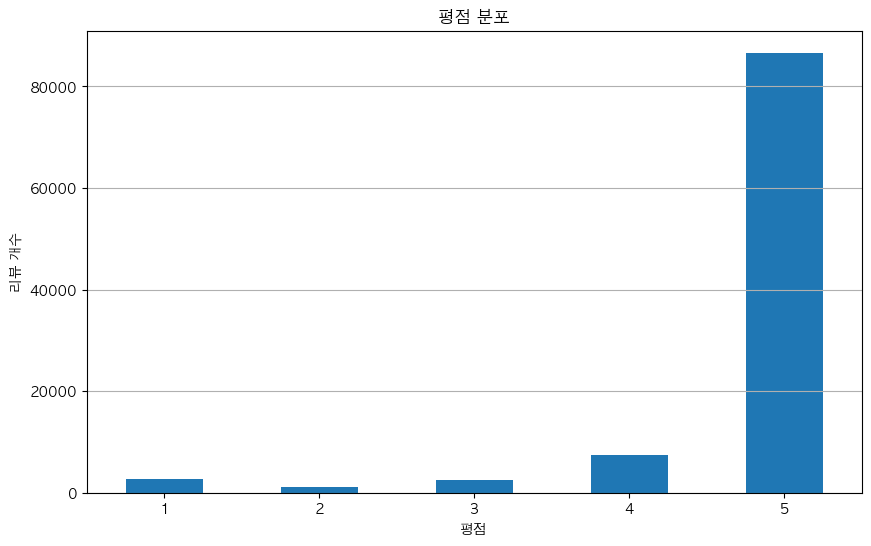

In [16]:
# df_complete_text 데이터 시각화
import matplotlib.pyplot as plt

# 한글 폰트
plt.rcParams['font.family'] = 'AppleGothic'  # macOS

# 평점 분포 시각화
plt.figure(figsize=(10, 6))
df_complete_text['평점'].value_counts().sort_index().plot(kind='bar')
plt.title('평점 분포')
plt.xlabel('평점')
plt.ylabel('리뷰 개수')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

In [10]:
df_non_text.head()

,상품명,구매상품명,작성일자,구매자명,평점,헤드라인,리뷰내용,도움수,이미지수
0,"홈플래닛 10W USB-A 2포트 멀티 충전기 (5V 2A), 화이트, 1개","홈플래닛 10W USB-A 2포트 멀티 충전기 (5V 2A), 화이트, 1개",2025.06.04,아아잉,5,NaN,NaN,0,0
2,"홈플래닛 10W USB-A 2포트 멀티 충전기 (5V 2A), 화이트, 1개","홈플래닛 10W USB-A 2포트 멀티 충전기 (5V 2A), 화이트, 2개",2025.06.03,정*준,5,NaN,NaN,0,0
3,"홈플래닛 10W USB-A 2포트 멀티 충전기 (5V 2A), 화이트, 1개","홈플래닛 10W USB-A 2포트 멀티 충전기 (5V 2A), 화이트, 1개",2025.06.03,백경민,5,NaN,NaN,0,0
4,"홈플래닛 10W USB-A 2포트 멀티 충전기 (5V 2A), 화이트, 1개","홈플래닛 10W USB-A 2포트 멀티 충전기 (5V 2A), 화이트, 1개",2025.06.03,백*수,3,NaN,NaN,0,0
5,"홈플래닛 10W USB-A 2포트 멀티 충전기 (5V 2A), 화이트, 1개","홈플래닛 10W USB-A 2포트 멀티 충전기 (5V 2A), 화이트, 1개",2025.06.03,이*유,5,NaN,NaN,0,0


In [13]:
df_non_text.describe()

,평점,도움수,이미지수
count,60274.000000,60274.000000,60274.000000
mean,4.748598,0.003119,0.025533
std,0.663717,0.175074,0.418289
min,1.000000,0.000000,0.000000
25%,5.000000,0.000000,0.000000
50%,5.000000,0.000000,0.000000
75%,5.000000,0.000000,0.000000
max,5.000000,20.000000,11.000000


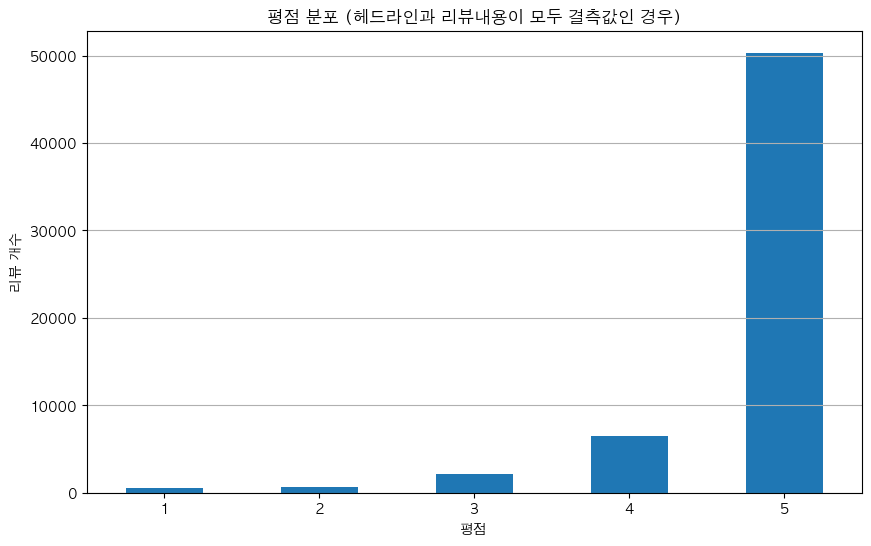

In [17]:
# df_non_text 데이터 시각화
plt.figure(figsize=(10, 6))
df_non_text['평점'].value_counts().sort_index().plot(kind='bar')
plt.title('평점 분포 (헤드라인과 리뷰내용이 모두 결측값인 경우)')
plt.xlabel('평점')
plt.ylabel('리뷰 개수')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

In [18]:
# 두 데이터 프레임을 다른 CSV 파일로 저장
df_complete_text.to_csv('data/Coupang-reviews-homeplanet/review_data_complete_text.csv', index=False)
df_non_text.to_csv('data/Coupang-reviews-homeplanet/review_data_non_text.csv', index=False)

In [19]:
df_complete_text.head()

,상품명,구매상품명,작성일자,구매자명,평점,헤드라인,리뷰내용,도움수,이미지수
1,"홈플래닛 10W USB-A 2포트 멀티 충전기 (5V 2A), 화이트, 1개","홈플래닛 10W USB-A 2포트 멀티 충전기 (5V 2A), 화이트, 1개",2025.06.03,정*날,5,잘 작동합니다.,잘 작동합니다.,0,0
6,"홈플래닛 10W USB-A 2포트 멀티 충전기 (5V 2A), 화이트, 1개","홈플래닛 10W USB-A 2포트 멀티 충전기 (5V 2A), 화이트, 1개",2025.06.03,이*민,4,♡Pulio 충전기로 쓰시려는 분들은 보세요♡,⚡️⚡️⚡️⚡️풀리오 동시충전 안됩니다⚡️⚡️⚡️⚡️풀리오 발마사지기 5V 2A 충...,0,0
7,"홈플래닛 10W USB-A 2포트 멀티 충전기 (5V 2A), 화이트, 1개","홈플래닛 10W USB-A 2포트 멀티 충전기 (5V 2A), 화이트, 2개",2025.06.02,박*혜,5,충전용으로 구매,다이소에서 조명을 샀는데저속충전 제품이 필요해 구매했어요충전기는 다이소보다 쿠팡이 ...,0,0
12,"홈플래닛 10W USB-A 2포트 멀티 충전기 (5V 2A), 화이트, 1개","홈플래닛 10W USB-A 2포트 멀티 충전기 (5V 2A), 화이트, 2개",2025.06.01,고*석,5,"작지만 든든한 2포트 충전기, 집·사무실 필수템!",후기 제목: 작지만 실속 있는 듀얼 충전기! 집안 곳곳에 두기 딱 좋아요집에서 자주...,0,0
14,"홈플래닛 10W USB-A 2포트 멀티 충전기 (5V 2A), 화이트, 1개","홈플래닛 10W USB-A 2포트 멀티 충전기 (5V 2A), 화이트, 2개",2025.06.01,고*석,5,두 기기 동시에 OK! 작지만 실속 있는 듀얼 USB,후기 제목: 간편한 듀얼 충전! 작지만 실속 있는 홈플래닛 USB 충전기여러 기기 ...,0,0
